## Metodos numéricos: Descenso del Gradiente

Es un algoritmo iterativo para encontrar un mínimo local de una función no lineal monovariable o multivariable mediante aproximaciónes sucesivas. La búsqueda de la solución sigue la trayectoria del gradiente descendente más pronunciado (pendiente máxima) hasta llegar a su menor valor. El proceso iterativo continua hasta que la máxima tasa de cambio del gradiente sea muy pequeña.

El método funciona con la suposición que la función tiene forma convexa alrededor de un punto. El método tambien puede usarse para encontrar máximos locales de una función $f$ aplicándola a la función $-f$.

Sea $f:R^n \rightarrow R$.

El gradiente de $f$ es el vector de las derivadas parciales.
$$\nabla f=\left[\frac{df}{dx_i}\right], i=1,2 ...n$$

El $\nabla f$ envaluado en un punto $X=[x_0,x_1, ... x_n]$ se representara:

$$c=∇f(X)$$

La dirección de búsqueda descentente para obtener el mínimo de $f$ en el punto $X$  es la dirección opuesta al gradiente de $f$ en el punto $X$, es decir:

$$d=-\frac{c}{\|c\|}$$

Finalmente, el mínimo de la $f$ se obtiene iterativamente mediante:

$$X_{i+1}=X_i+\alpha d_{i}$$

El valor de $\alpha$ se conoce como paso.


## Monovariable

In [1]:
import numpy as np
import matplotlib.pyplot as plt

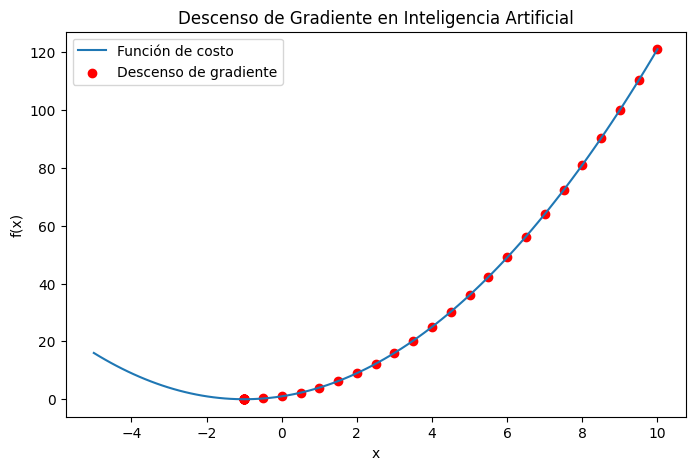

In [2]:
def f(x):
    return x**2 + 2*x + 1

# Derivada de la función
def df(x):
    return 2*x + 2

# Descenso de Gradiente
x = 10  # Valor inicial
learning_rate = 0.5
x_history = [x]

for _ in range(50):  # 50 iteraciones
    if np.linalg.norm(df(x))!=0:
        x = x - learning_rate * df(x)/np.linalg.norm(df(x))

    x_history.append(x)

# Visualizar la optimización
x_vals = np.linspace(-5, 10, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label="Función de costo")
plt.scatter(x_history, [f(i) for i in x_history], color='red', label="Descenso de gradiente")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Descenso de Gradiente en Inteligencia Artificial")
plt.show()

¿ Qué sucede al variar el learning_rate?

## Multivariable

$$f(x,y)=2x^2-xy+y^2-7y$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def f(x,y):
    return 2*x**2-x*y+y**2-7*y
def gradiente(x,y):
    return np.array([4*x-y, -x+2*y-7])

### Grafico de la función

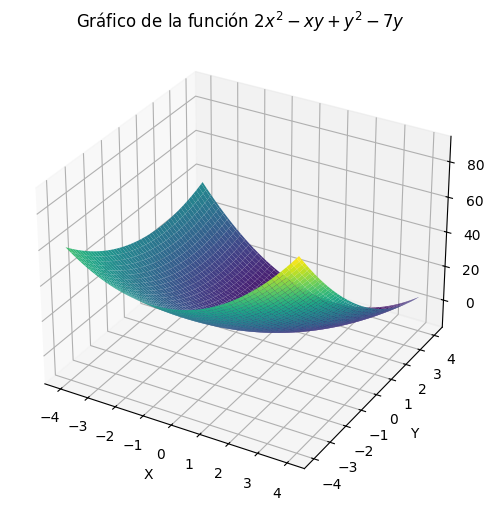

In [7]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Definir la función
Z = f(X,Y) #2*X**2 - X*Y + Y**2 - 7*Y

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# Graficar la superficie
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfico de la función $2x^2 - xy + y^2 - 7y$')

plt.show()


In [8]:
# descenso del gradiente
def descenso_gradiente(df, X0, alpha, iteraciones=100, e=0.01):
    # in: función gradiente, punto inicial, tasa de aprendizaje, número de iteraciones
    # out: minimo
    X=X0
    for i in range(iteraciones):
        d=-df(X[0],X[1])/np.linalg.norm(df(X[0],X[1]))
        X=X+alpha*d
        if np.linalg.norm(df(X[0],X[1]))<e:     #criterio de parada
            break
    return X

In [9]:
X_start = np.array([0,0])
X_end=descenso_gradiente(gradiente, X_start, 0.1)

In [10]:
# mínimo de la función
X_end

array([0.94942839, 4.02094745])

In [11]:
f(X_end[0], X_end[1])

np.float64(-13.993386881842614)

In [12]:
# si bien no es exactamente lo mismo, CG es un extension de GD...
from scipy.optimize import minimize

def obj(args):
    return f(args[0], args[1])

result = minimize(obj, X_start, method="CG")
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -13.999999999999996
       x: [ 1.000e+00  4.000e+00]
     nit: 2
     jac: [ 0.000e+00 -1.192e-07]
    nfev: 15
    njev: 5


### Modificar el código para encotrar el mínimo de las siguientes funciones

$$f(x,y,z)=5(x-1)^2+3(y+2)^2
+4(z+3)^2+xyz+1$$

Resultado aproximado.

$X=[ 0.44585112, -1.74648132,-2.8817343]$

$f(X)=5.028$

In [21]:
def f(x, y, z):
    return 5*(x - 1)**2 + 3*(y + 2)**2 + 4*(z + 3)**2 + x*y*z + 1
def gradiente(x, y, z):
    return np.array([10*(x - 1) + y*z, 6*(y + 2) + x*z, 8*(z + 3) + x*y])

def descenso_gradiente(df, X0, alpha, iteraciones=1000, e=0.001):
    # in: función gradiente, punto inicial, tasa de aprendizaje, número de iteraciones
    # out: minimo
    X=X0
    for i in range(iteraciones):
        d=-df(X[0],X[1]),X[2]/np.linalg.norm(df(X[0],X[1],X[2]))
        X=X+alpha*d
        if np.linalg.norm(df(X[0],X[1],X[2]))<e:     #criterio de parada
            break
    return X


X_start = np.array([0, 0, 0])
X_end=descenso_gradiente(gradiente, X_start, 0.5)
X_end

TypeError: gradiente() missing 1 required positional argument: 'z'

In [15]:
f(X_end[0], X_end[1], X_end[2])

IndexError: index 2 is out of bounds for axis 0 with size 2

$$f(x,y,z,w)=5(x-1)^2+3(y
-2)^2+4(z+3)^2+(w-1)^4-xyzw+5$$

Resultado aproximado.
$X=[  1.15798408,  2.14224729, -3.07436198, -0.23997327]$

$f(X)=5.74146222$

In [ ]:
# Mañana SGD en IA